In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

## Load the Model

In [14]:
model = tf.keras.models.load_model("dataset\\object_detection_v2.h5")

## Load Image

In [43]:
image = load_img(path="dataset\\Images_1\\Cars4.png")
image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)

image1 = load_img(path="dataset\\Images_1\\Cars4.png", target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0 # convert into array and normalize output

In [44]:
# size of the image
image.shape

(350, 590, 3)

(-0.5, 589.5, 349.5, -0.5)

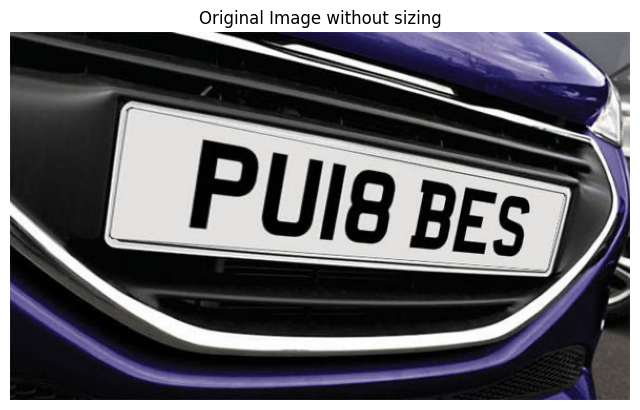

In [45]:
plt.figure(figsize=(8,6))
plt.imshow(image)
plt.title("Original Image without sizing")
plt.axis("off")

In [46]:
# size of the image1
image_arr_224.shape

(224, 224, 3)

In [47]:
# reshaping

test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

## Prediction

In [48]:
coords = model.predict(test_arr)
coords

1/1 [==============================] - 0s 269ms/step


array([[0.41442248, 0.7548542 , 0.41324446, 0.55362684]], dtype=float32)

## Denormalization

In [49]:
h,w,d = image.shape

In [50]:
denorm = np.array([w,w,h,h])
coords = coords * denorm

coords

array([[244.50926453, 445.36397934, 144.63555962, 193.76939237]])

In [51]:
coords = coords.astype(np.int32)
coords

array([[244, 445, 144, 193]])

## Bounding Box

(244, 144) (445, 193)


(-0.5, 589.5, 349.5, -0.5)

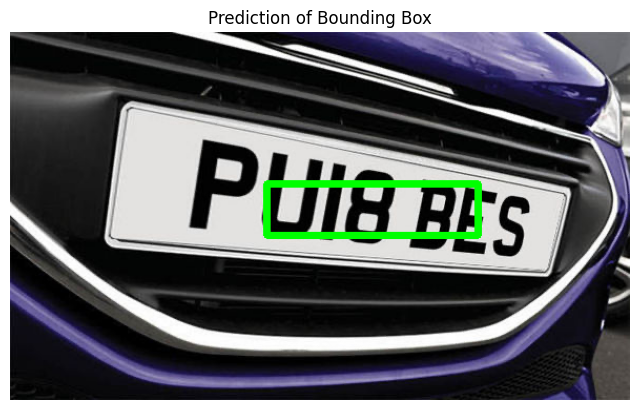

In [52]:
xmin, xmax, ymin, ymax = coords[0]

pt1 = (xmin, ymin)
pt2 = (xmax, ymax)

print(pt1, pt2)

cv2.rectangle(image, pt1, pt2, (0,255,0), 5)

plt.figure(figsize=(8,6))
plt.imshow(image)
plt.title("Prediction of Bounding Box")
plt.axis("off")

## Pipeline

In [53]:
path="dataset\\Images_1\\Cars11.png"

def object_detection(path):
    # read image
    image = load_img(path) #PIL Object
    image = np.array(image, dtype=np.uint8) # 8 bit array (0,255)
    image1 = load_img(path, target_size=(224,224))
    
    # data preprocessing
    image_arr_224 = img_to_array(image1)/255.0 # convert into array and normalize output

    # get the shape
    h,w,d = image.shape

    # resize
    test_arr = image_arr_224.reshape(1,224,224,3)

    # prediction
    coords = model.predict(test_arr)

    # denormalize
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)

    xmin, xmax, ymin, ymax = coords[0]
    pt1 = (xmin, ymin)
    pt2 = (xmax, ymax)
    print(pt1, pt2)
    cv2.rectangle(image, pt1, pt2, (0,255,0), 5)
    
    return image, coords

1/1 [==============================] - 0s 391ms/step
(244, 144) (445, 193)


(-0.5, 589.5, 349.5, -0.5)

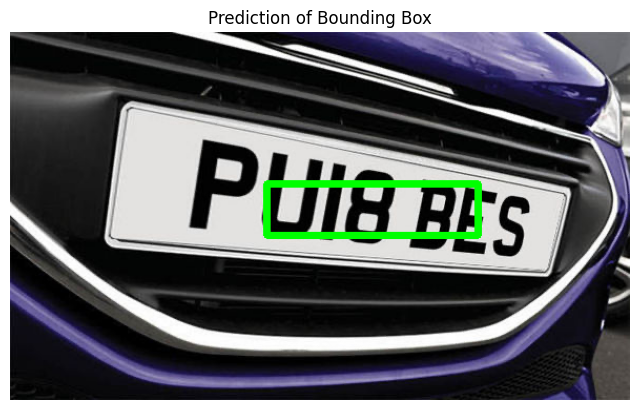

In [54]:
img,coords = object_detection(path="dataset\\Images_1\\Cars4.png")

plt.figure(figsize=(8,6))
plt.imshow(img)
plt.title("Prediction of Bounding Box")
plt.axis("off")

# OCR - Optical Character Recognition

In [55]:
import easyocr 

In [56]:
import pytesseract as pt

ModuleNotFoundError: No module named 'pytesseract'

1/1 [==============================] - 0s 295ms/step
(244, 144) (445, 193)


(-0.5, 589.5, 349.5, -0.5)

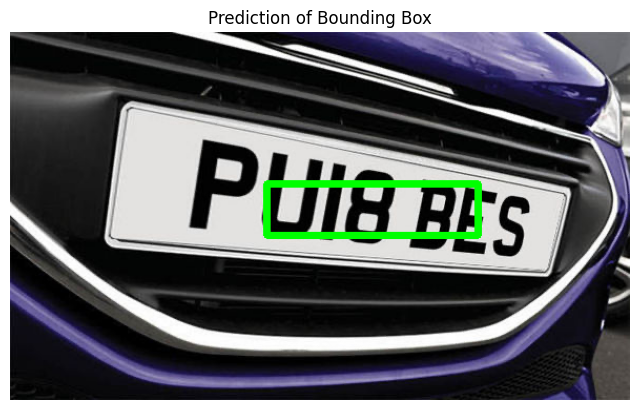

In [58]:
path="dataset\\Images_1\\Cars4.png"

img,coords = object_detection(path)

plt.figure(figsize=(8,6))
plt.imshow(img)
plt.title("Prediction of Bounding Box")
plt.axis("off")

(-0.5, 200.5, 48.5, -0.5)

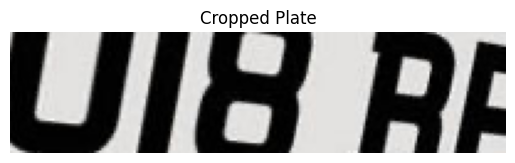

In [59]:
img = np.array(load_img(path))

xmin, xmax, ymin, ymax = coords[0]
roi = img[ymin:ymax, xmin:xmax]

plt.imshow(roi)
plt.title("Cropped Plate")
plt.axis("off")

## Extract Text from the Plate

In [60]:
roi

array([[[195, 194, 192],
        [ 67,  66,  64],
        [ 11,  10,   8],
        ...,
        [224, 224, 224],
        [223, 223, 223],
        [222, 222, 222]],

       [[182, 181, 179],
        [ 52,  51,  49],
        [  5,   4,   2],
        ...,
        [226, 226, 226],
        [228, 228, 228],
        [228, 228, 228]],

       [[162, 161, 159],
        [ 35,  34,  32],
        [  2,   1,   0],
        ...,
        [224, 224, 224],
        [223, 223, 223],
        [226, 226, 226]],

       ...,

       [[213, 213, 213],
        [172, 172, 172],
        [ 76,  76,  76],
        ...,
        [224, 224, 224],
        [223, 223, 223],
        [224, 224, 224]],

       [[237, 237, 237],
        [227, 227, 227],
        [206, 206, 206],
        ...,
        [226, 226, 226],
        [227, 227, 227],
        [227, 227, 227]],

       [[222, 221, 219],
        [229, 228, 226],
        [231, 230, 228],
        ...,
        [229, 225, 222],
        [229, 225, 222],
        [229, 225, 222]]

In [1]:
import easyocr

# Create a reader instance
reader = easyocr.Reader(['en'])

# Read from an image file
result = reader.readtext(roi)

# Print the results
for detection in result:
    text = detection[1]
    print(text)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


NameError: name 'roi' is not defined